# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(3)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [4]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [5]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 2a) Plot the data in a scatterplot

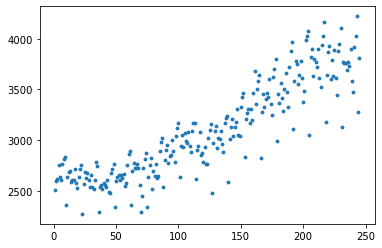

In [6]:
#Your code for scatterplot here

plt.scatter(xvals, yvals, s=8)
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.show()

## 2b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

Least squares coefficients for k=1 linear regression: y = 5.939 x + 2367.382
MSE1= 45323.636, R2 = 0.796


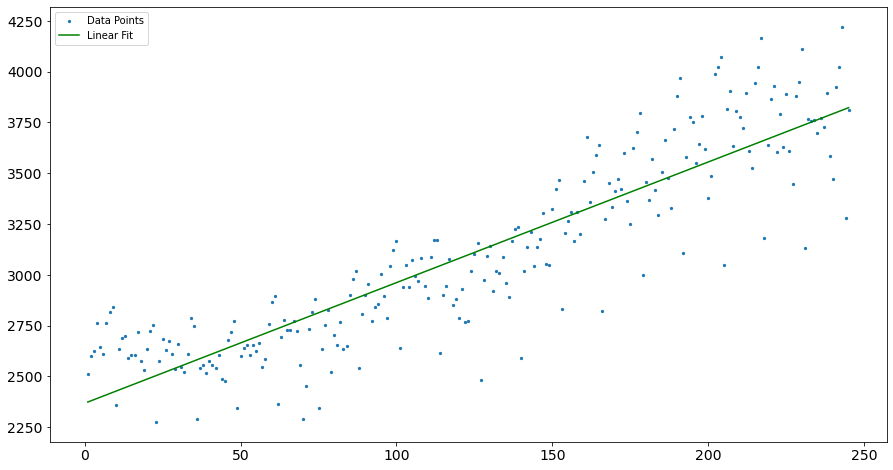

In [7]:
#Your code here
def polyreg(data_matrix: np.array, k: int)->np.array:
    '''
    The function returns the the coefficient vector beta, the fit X*beta, and the vector of residuals y-X*beta
    '''
    N, _ = data_matrix.shape
    assert _ == 2
    t, y = [data_matrix[:,i] for i in range(2)]
    X = np.ones((N,k+1))
    for i in range(1,k+1):
        X[:,i]= t**i
    P = np.linalg.inv((X.T).dot(X))
    P = P.dot(X.T)
    beta = P.dot(y)
    fit = np.dot(X, beta)
    residual = y - fit
    return (beta,fit,residual)

xy_data= np.column_stack([xvals, yvals])
beta, fit, residual = polyreg(xy_data, 1)
MSE = residual.dot(residual) /N
R2 = 1- (MSE/ yvals.var())
print(f'Least squares coefficients for k=1 linear regression: y = {round(beta[1],3)} x + {round(beta[0],3)}')
print(f'MSE1= {np.round(MSE,3)}, R2 = {np.round(R2,3)}')
plt.scatter(xvals, yvals, s=5, label='Data Points')
plt.plot(xvals, beta[0]+ beta[1]* xvals,'g',label='Linear Fit')
plt.legend()
plt.show()


## 2c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

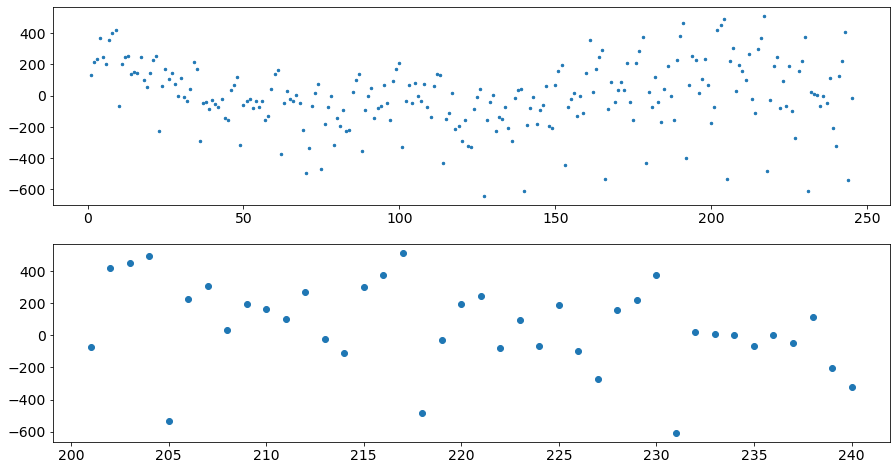

In [8]:
# Your code here
plt.subplot(211)
plt.scatter(xvals, residual, s=6)
plt.subplot(212)
plt.scatter(xvals[200:240],residual[200:240])
plt.show()


Even though it is not a sinusoid, there is a repeating pattern whose period is about 13 time steps, which corresponds to about 364 days, so 1 year.

## 2d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


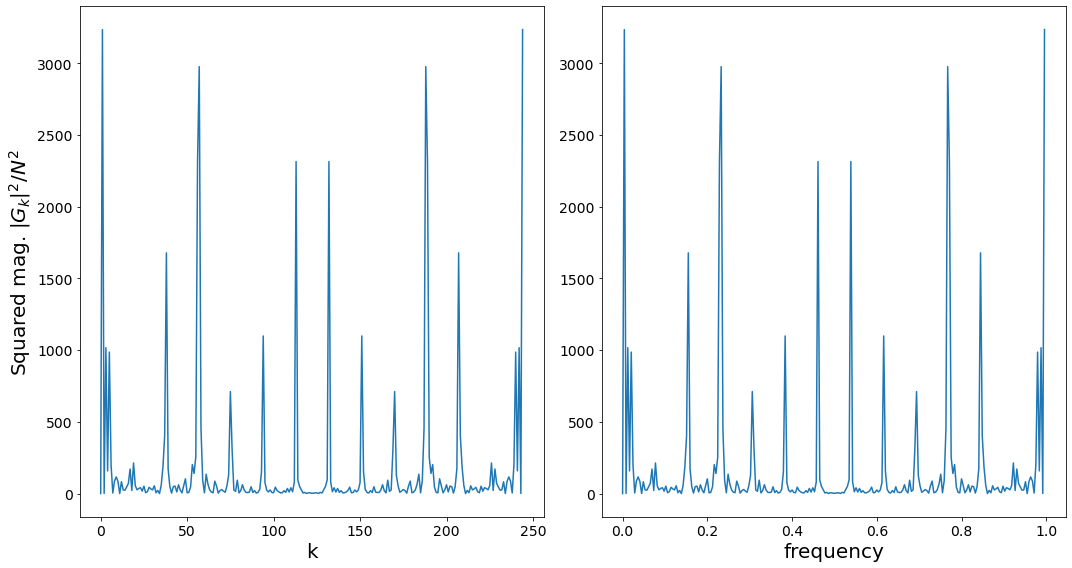

In [9]:
# Your code to compute and plot the histogram
from numpy.fft import fft
df_tfl['days_parsed'] = df_tfl.Days.apply(lambda x: int(x[:-1]))
T = df_tfl.days_parsed.mean() /365.5 ##Get the periodicity raported to 1 year instead of period count
residual_freq = fft(residual, N) / N
pdgram = np.abs(residual_freq)**2
indices = np.linspace(0, N-1, N)
freq = indices/ N
angular_freq = 2* np.pi* freq

plt.title('Periodogram of the linear fit residuals')
plt.subplot(121)
plt.plot(indices, pdgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freq, pdgram)
plt.xlabel('frequency')
plt.tight_layout()
plt.show()

In [10]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
high = pdgram.max()
top_ind  = indices[(pdgram >= 0.5 * high)]
top_freq =    freq[(pdgram >= 0.5 * high)]
assert top_ind.sum()%N==0
#Get rid of conjugate pairs
top_ind=top_ind[:top_ind.size//2]
top_freq=top_freq[:top_freq.size//2]


In [11]:
#Get temporal frequencies
time_top_freq = 1/T * top_freq
print(f'The most significant harmonic components correspond to the following freqencies in yr^-1 :\n{time_top_freq}')

The most significant harmonic components correspond to the following freqencies in yr^-1 :
[0.05310956 2.01816332 2.97413543 3.02724499 6.00138041]


## 2e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

All numerical outputs should be displayed to three decimal places.

Least squares coefficients for linear regression:[-51.253 101.556  61.628 -54.006 -15.581 -94.797  81.659  72.381  32.472
  90.589]
MSE_sc= 20297.501, R2 = 0.552


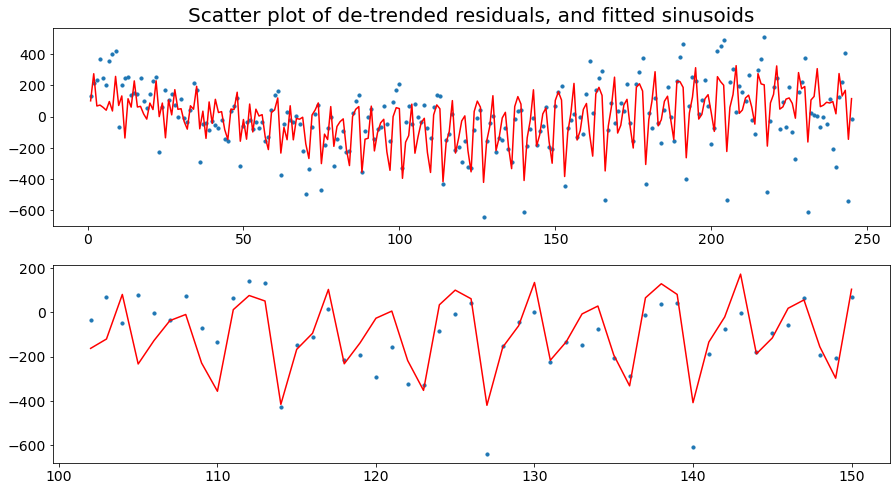

In [12]:
def harmonic_reg(t: np.array, y: np.array, frequencies: np.array)->np.array:
    '''
    The function returns the the coefficient vector beta, the fit X*beta, and the vector of residuals y-X*beta
    '''
    assert t.shape==y.shape
    N = t.size
    X = np.ones((N, 2* len(frequencies)))
    for i in range(len(frequencies)):
        X[:,2*i  ] = np.sin(2 *np.pi *frequencies[i] *t)
        X[:,2*i+1] = np.cos(2 *np.pi *frequencies[i] *t)
    P = np.linalg.inv((X.T).dot(X))
    P = P.dot(X.T)
    beta = P.dot(y)
    fit = np.dot(X, beta)
    residual = y - fit
    return (beta,fit,residual)

beta_sc, fit_sc, residual_sc = harmonic_reg(xvals, residual, top_freq)
MSE_sc = residual_sc.dot(residual_sc) / residual_sc.size
R2_sc = 1 - MSE_sc / residual.var()
print(f'Least squares coefficients for linear regression:{np.round(beta_sc,3)}')
print(f'MSE_sc= {np.round(MSE_sc,3)}, R2 = {np.round(R2_sc,3)}')

plt.subplot(211)
plt.scatter(xvals, residual, s=10)
plt.plot(xvals, fit_sc, 'r')
plt.title('Scatter plot of de-trended residuals, and fitted sinusoids')
# Zoom in to a few values
plt.subplot(212)
plt.scatter(xvals[101:150], residual[101:150], s=10)
plt.plot(xvals[101:150], fit_sc[101:150], 'r')
plt.show()


The MSE is halved by adding the seasonality correction, and a small R suggests that we can improve the precision by including more terms.

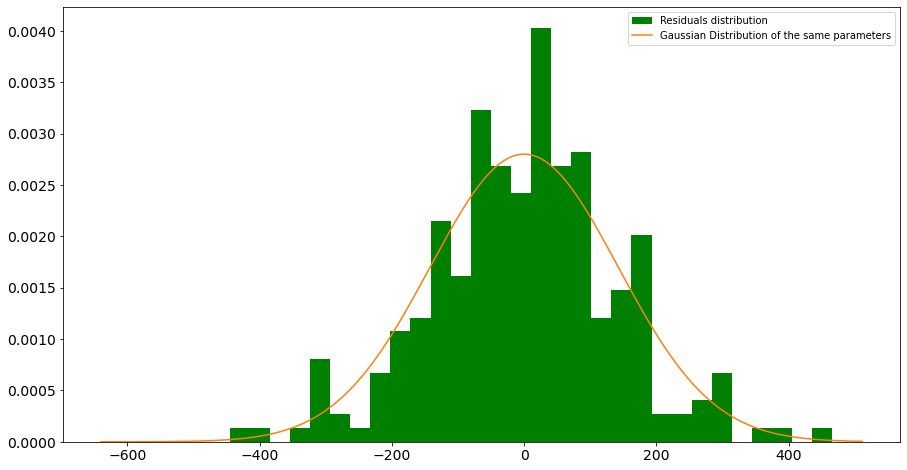

In [13]:
from scipy.stats import norm

n, bins, patches = plt.hist(residual_sc, bins=30, density=True, facecolor='green',label='Residuals distribution')
x_pdf = np.linspace(residual.min(), residual.max(),1000)
y_pdf = norm.pdf(x_pdf,loc = residual_sc.mean(), scale = residual_sc.std() )
plt.plot(x_pdf,y_pdf,label='Gaussian Distribution of the same parameters')
plt.legend()
plt.show()

## 2f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

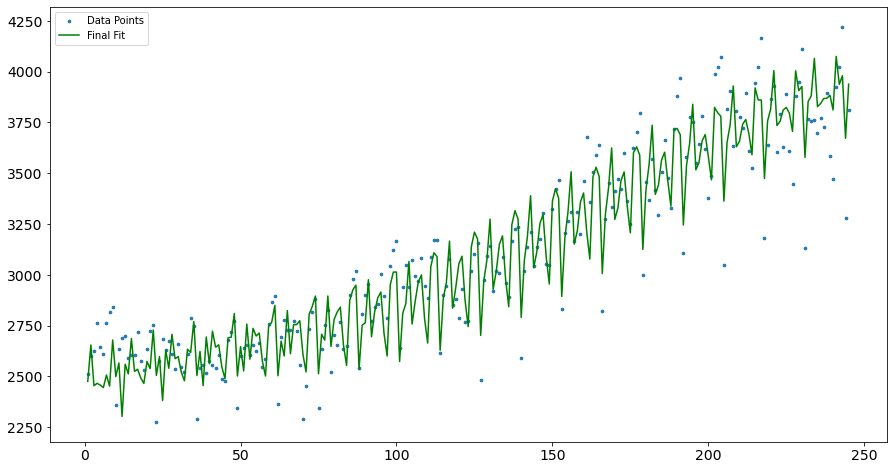

In [14]:
y_pred = fit + fit_sc
plt.scatter(xvals, yvals, s=7, label='Data Points')
plt.plot(xvals, y_pred,'g',label='Final Fit')
plt.legend()
plt.show()

In [15]:
residual_total= yvals - y_pred
mean_total = residual_total.mean()
print(f'The mean of the new residuals is {round(mean_total,3)}')
MSE_final = residual_total.dot(residual_total) / N
R2_final  = 1- MSE_final/ yvals.var()
print('Mean squared error for the combined fit = ', np.round(MSE_final,3))
print('R^2 coefficient of combined fit = ', np.round(R2_final, 3))

The mean of the new residuals is 0.0
Mean squared error for the combined fit =  20297.501
R^2 coefficient of combined fit =  0.908


R^2 got improved from 0.8 to 0.9, while the MSE halved, so fitting sinusoidal components proved to model really well the seasonality of the data.